
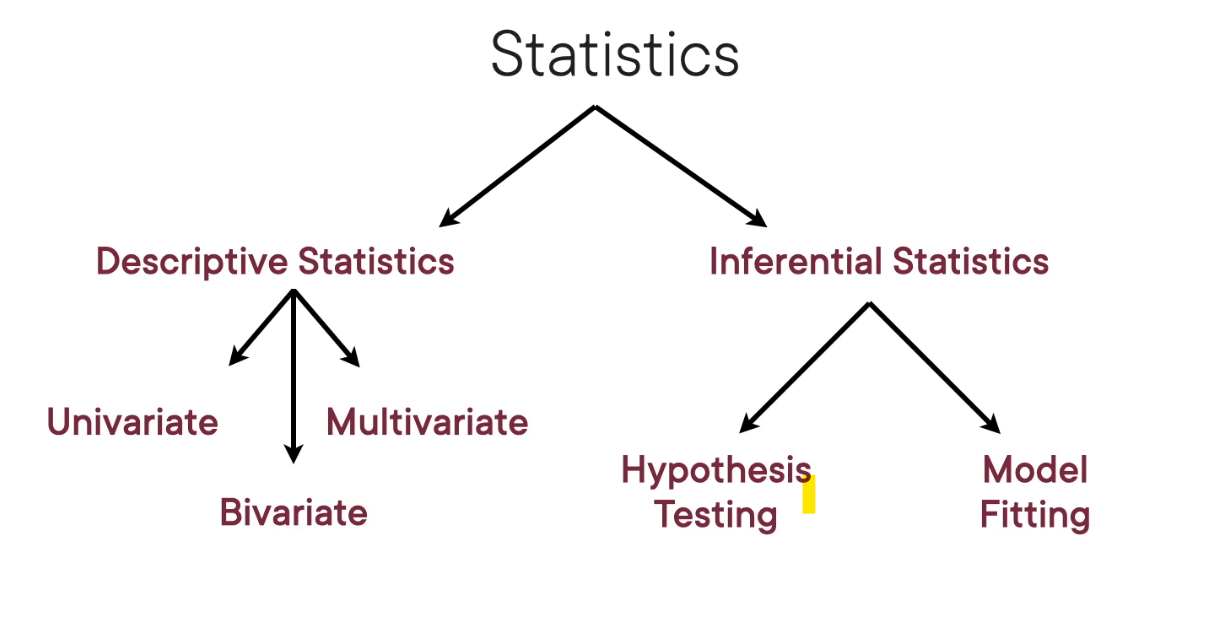

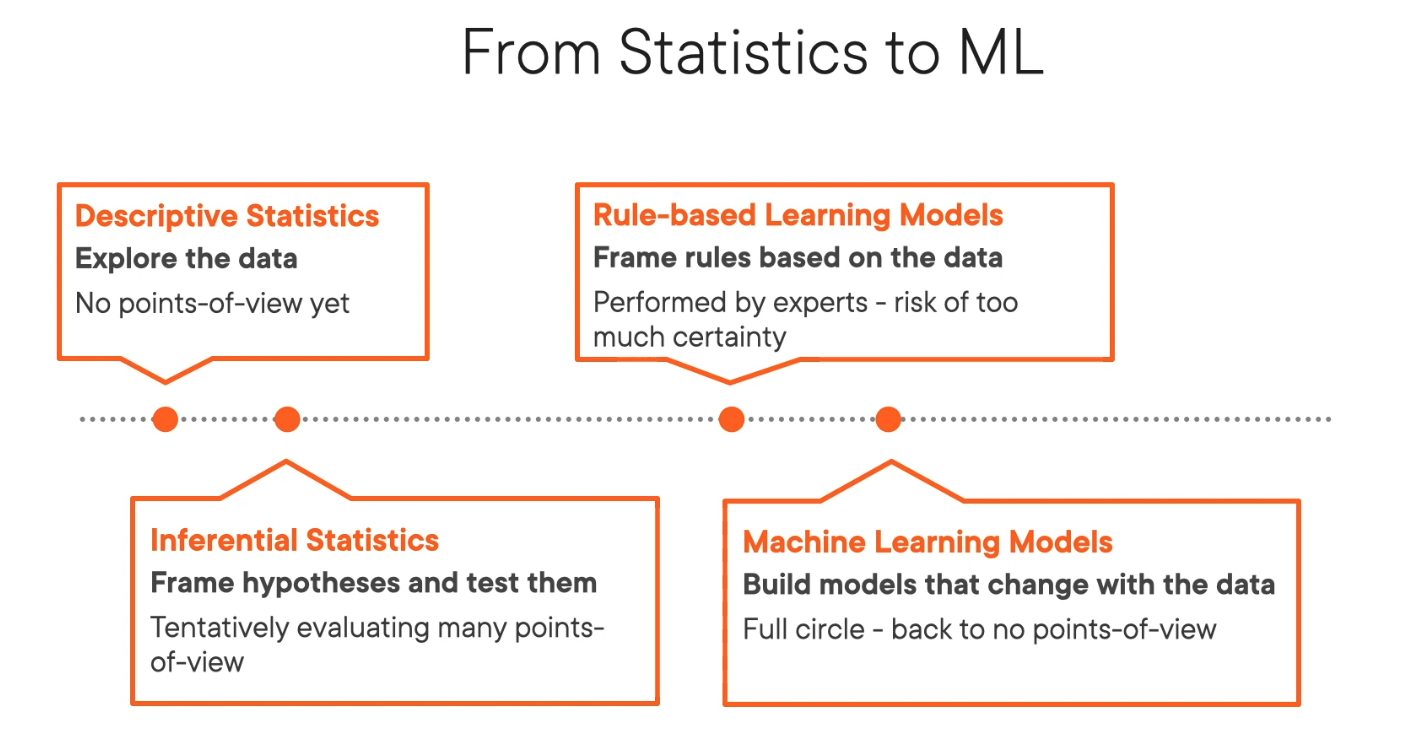


#### Hypothesis - proposed explanation for a phenomenon, objectively testable.
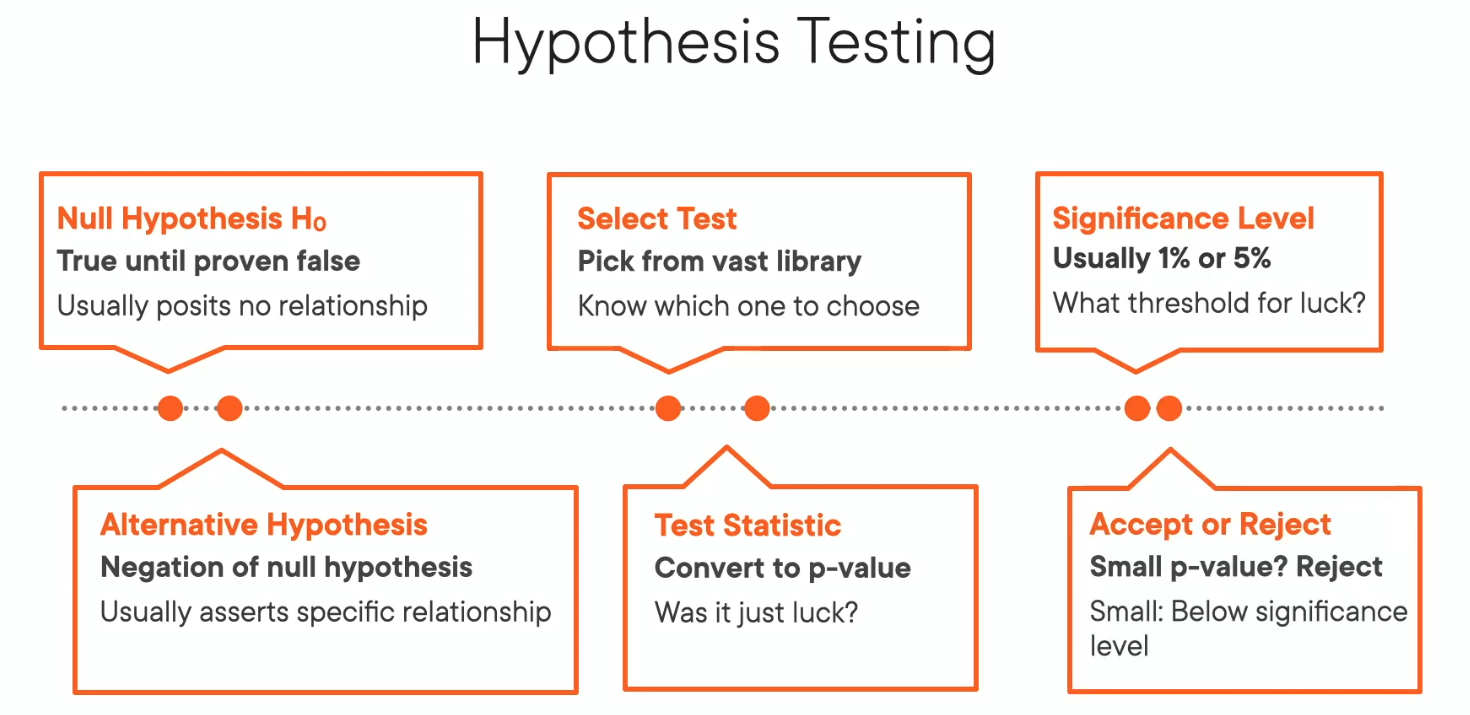

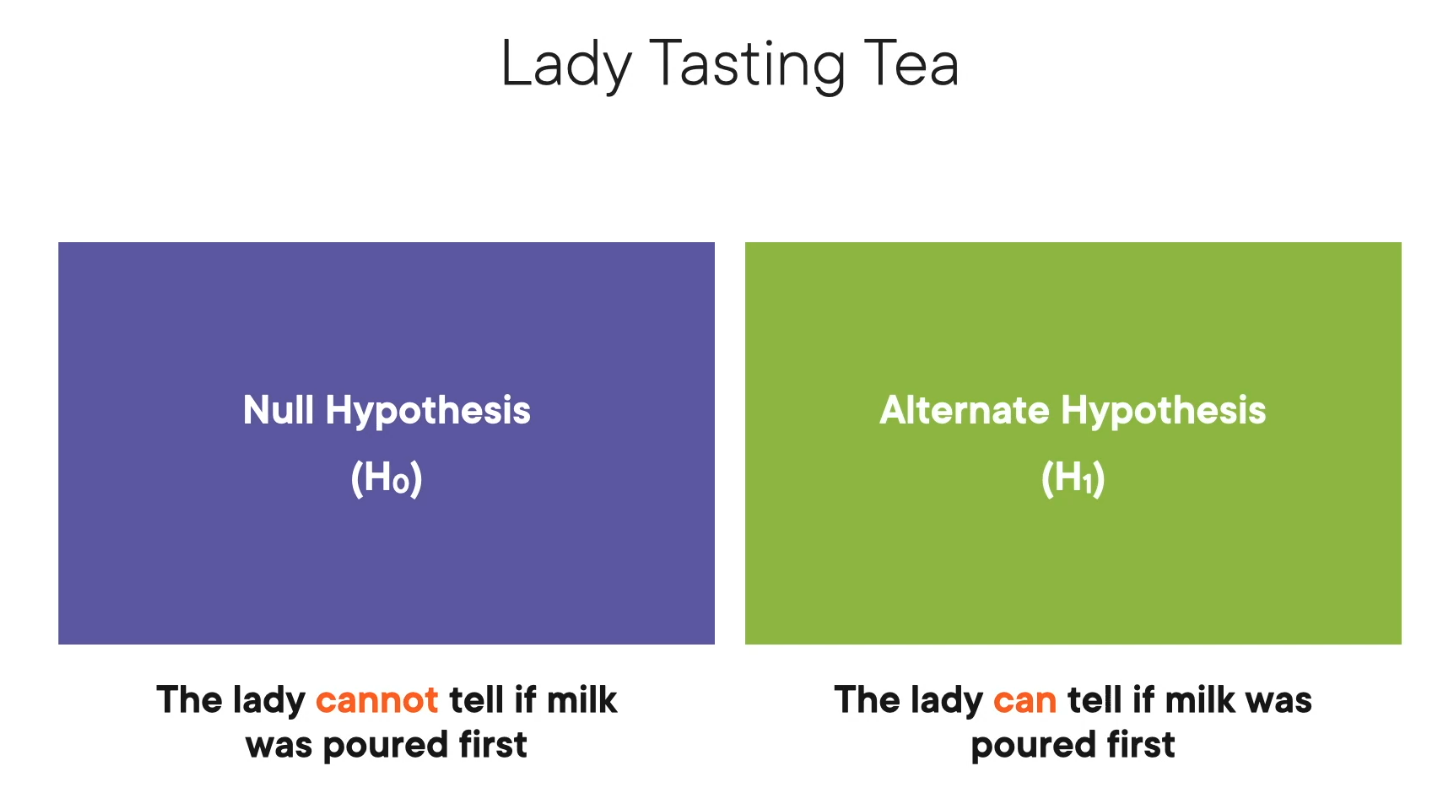
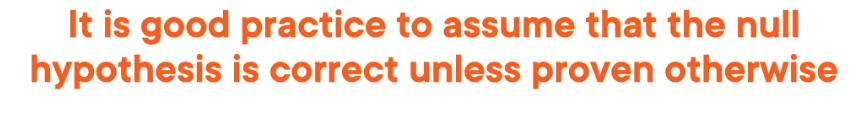
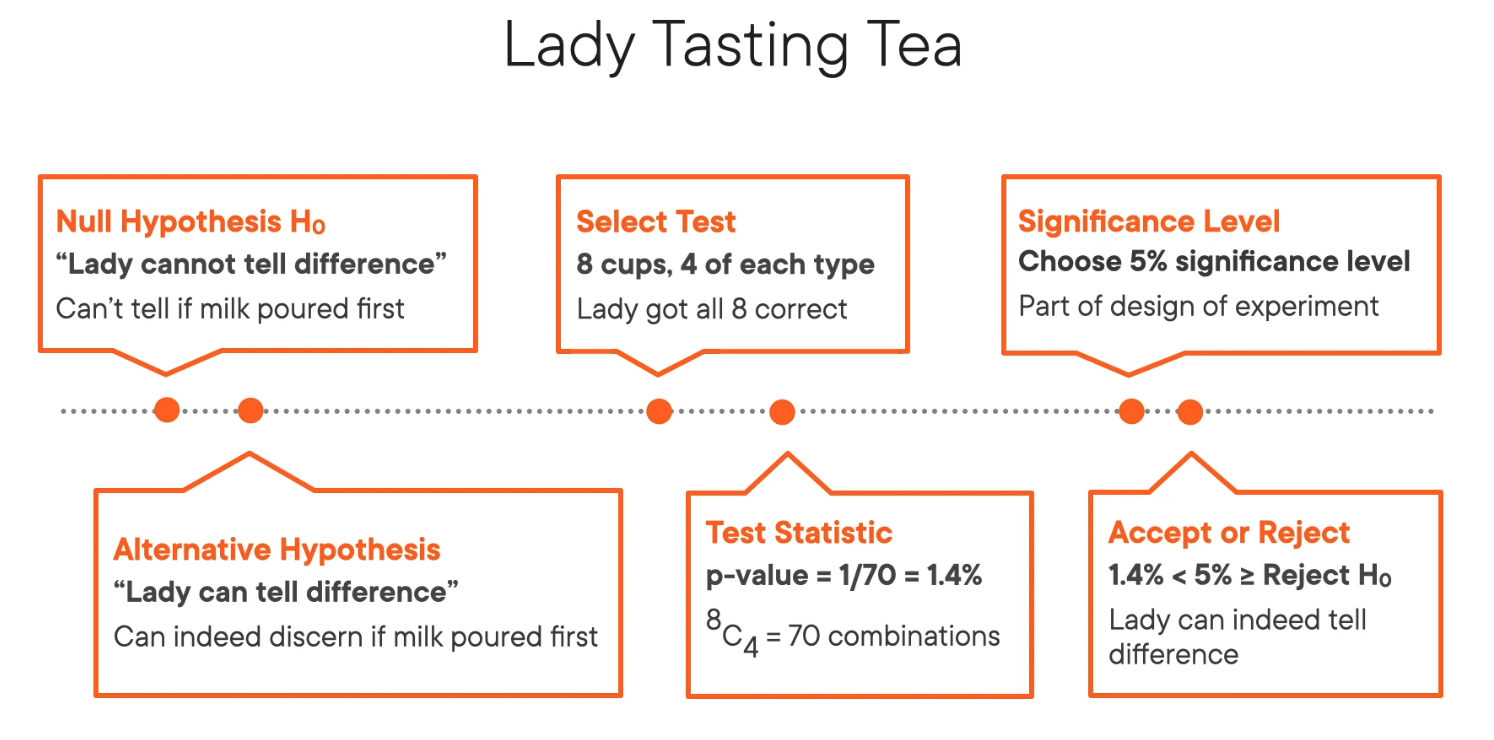

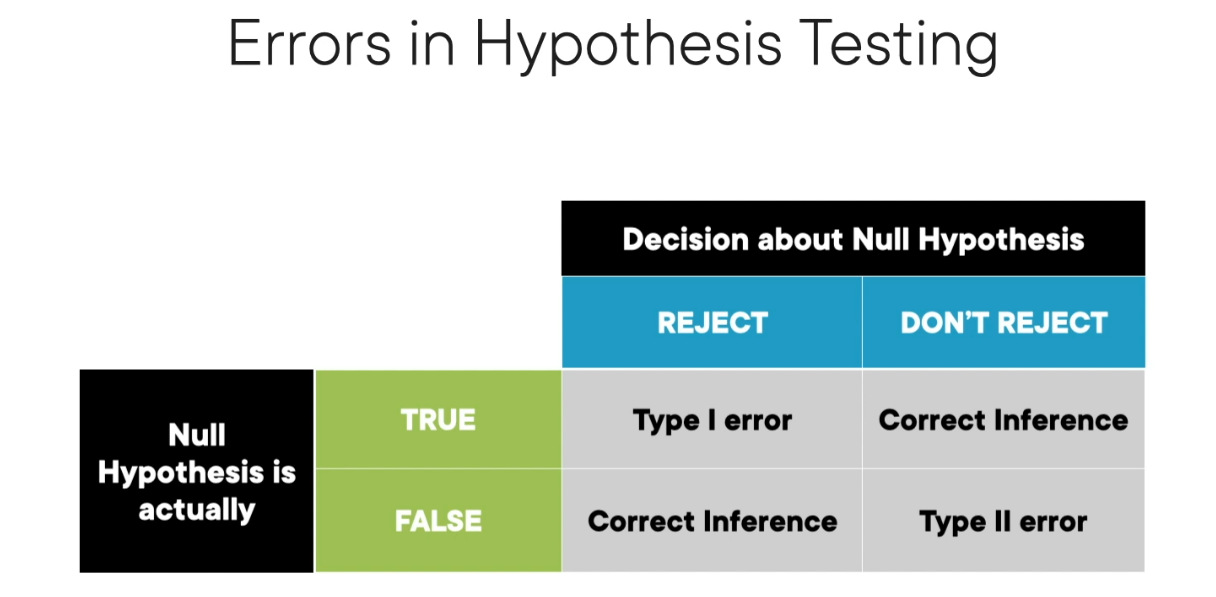
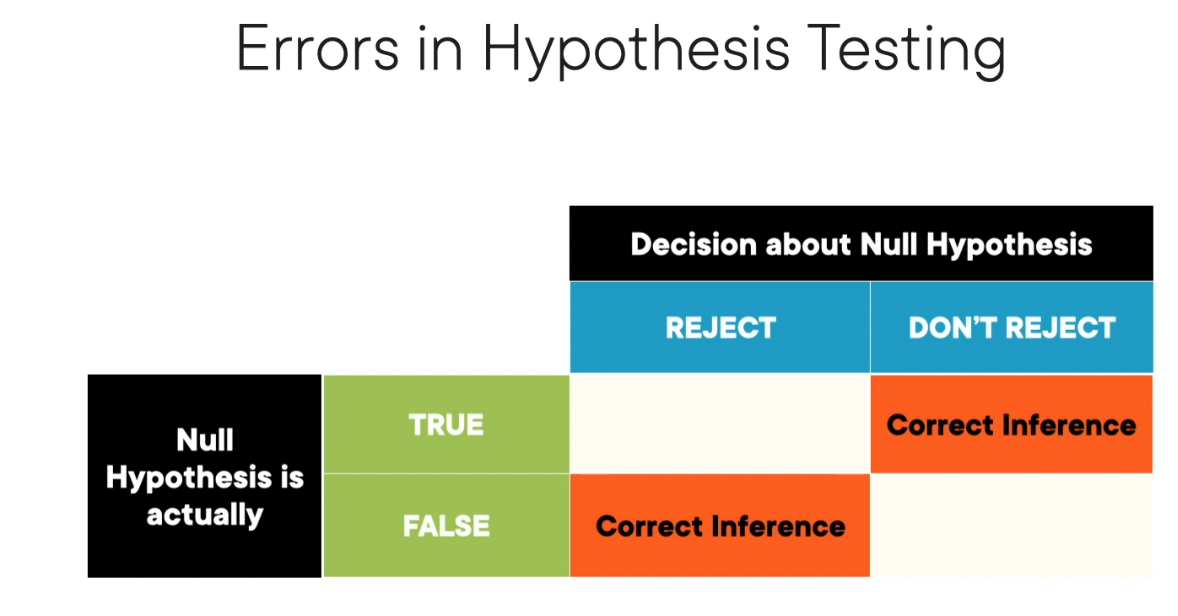
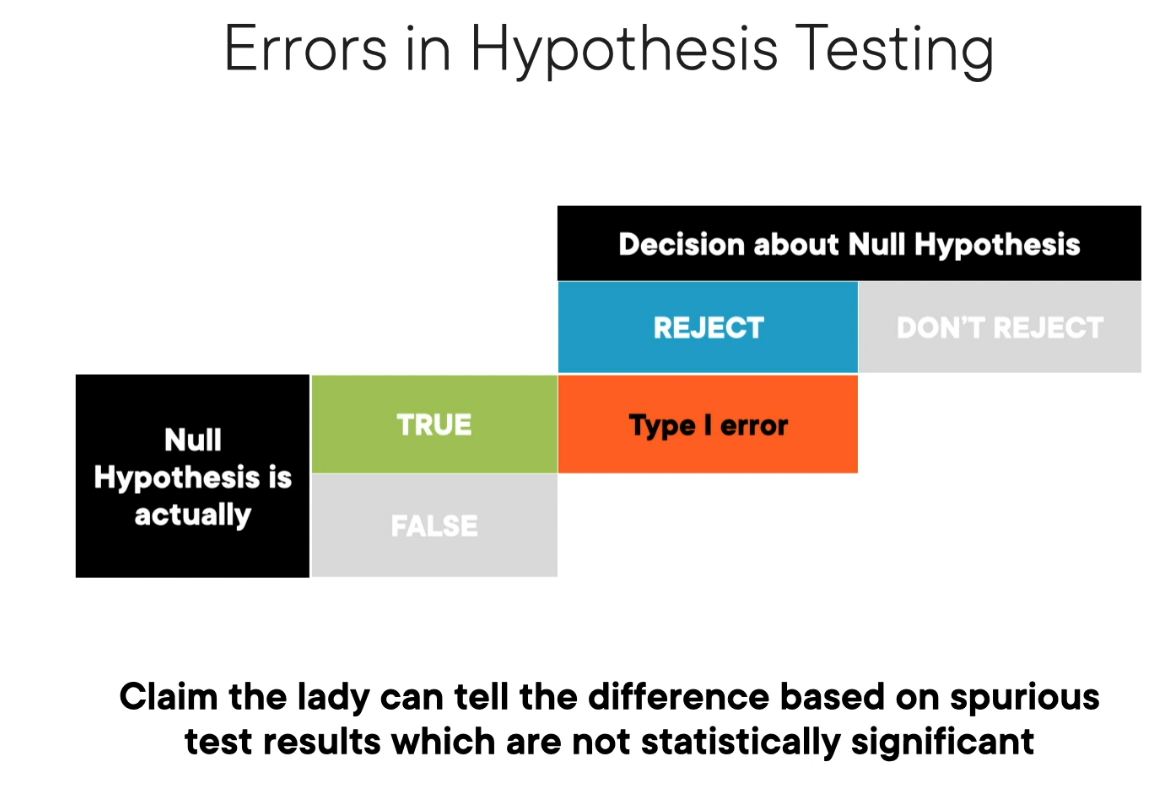
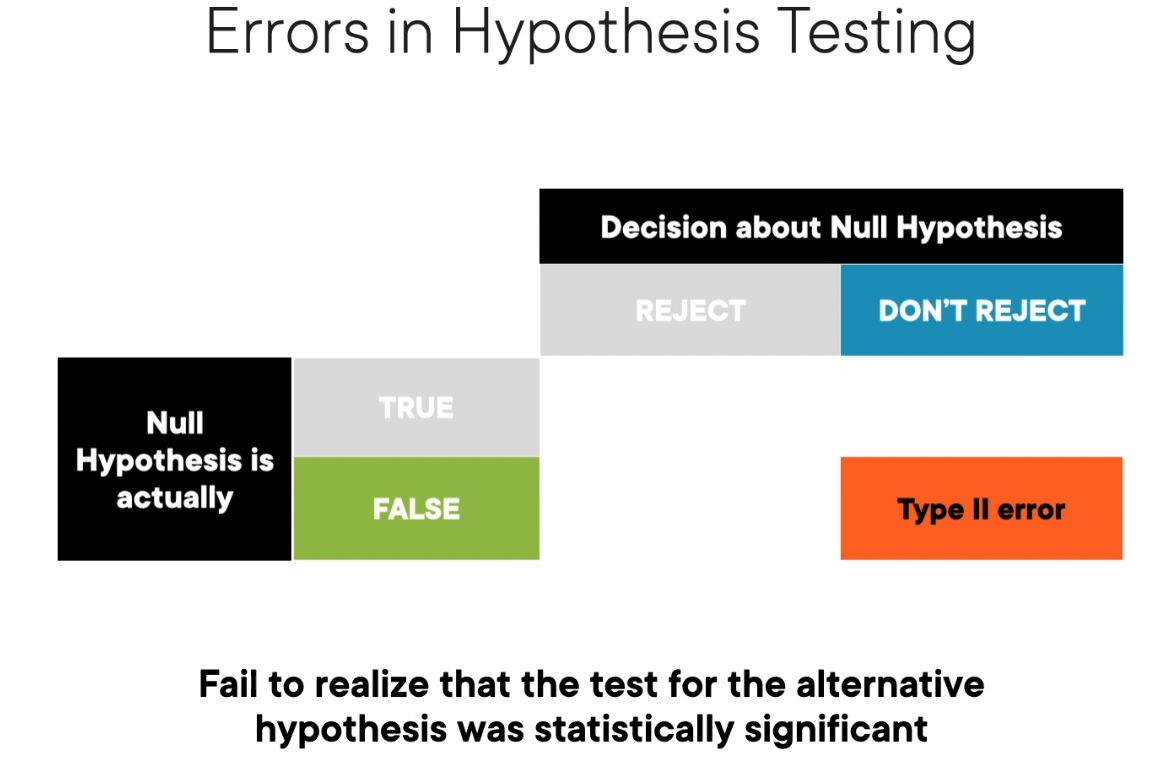

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
birth_weight_data = pd.read_csv("C:/Projects/learning/datasets/pl-foundations-statistics-probability-machine-learning/Birthweight_reduced_kg_R.csv")
birth_weight_data.head()                                

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [3]:
birth_weight_data.shape

(42, 16)

In [4]:
birth_weight_data.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

In [5]:
birth_weight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
smoker,42.0,0.523810,0.505487,0.00,0.00,1.000,1.0000,1.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mnocig,42.0,9.428571,12.511737,0.00,0.00,4.500,15.7500,50.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00


In [6]:
birth_weight_data['smoker'].value_counts()

smoker
1    22
0    20
Name: count, dtype: int64

<Axes: xlabel='Birthweight', ylabel='Count'>

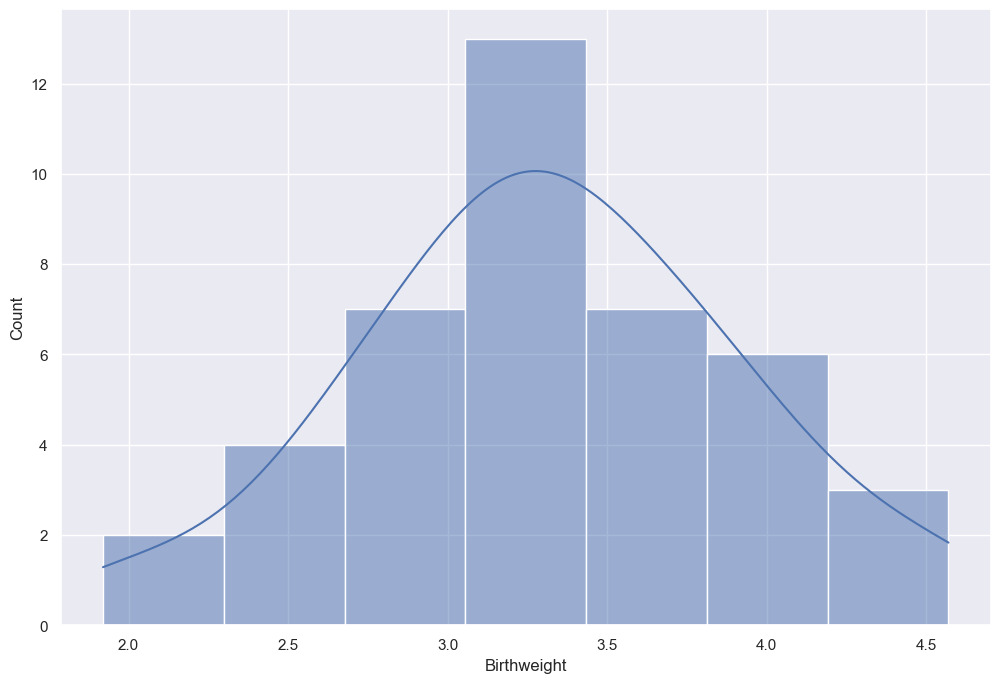

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(birth_weight_data['Birthweight'], kde=True)

((array([-2.13530463, -1.75401012, -1.52749667, -1.35994814, -1.2237273 ,
         -1.10706946, -1.00380487, -0.91026749, -0.8240868 , -0.74363219,
         -0.66772711, -0.5954891 , -0.52623439, -0.45941783, -0.39459348,
         -0.33138763, -0.2694798 , -0.20858878, -0.14846216, -0.08886798,
         -0.02958803,  0.02958803,  0.08886798,  0.14846216,  0.20858878,
          0.2694798 ,  0.33138763,  0.39459348,  0.45941783,  0.52623439,
          0.5954891 ,  0.66772711,  0.74363219,  0.8240868 ,  0.91026749,
          1.00380487,  1.10706946,  1.2237273 ,  1.35994814,  1.52749667,
          1.75401012,  2.13530463]),
  array([1.92, 2.05, 2.37, 2.51, 2.65, 2.66, 2.74, 2.75, 2.78, 2.9 , 2.92,
         3.  , 3.03, 3.11, 3.14, 3.15, 3.18, 3.19, 3.2 , 3.23, 3.27, 3.32,
         3.32, 3.35, 3.41, 3.42, 3.53, 3.55, 3.59, 3.63, 3.64, 3.65, 3.77,
         3.86, 3.87, 3.93, 3.94, 4.07, 4.1 , 4.32, 4.55, 4.57])),
 (0.6194639325106983, 3.3128571428571427, 0.9955922379790386))

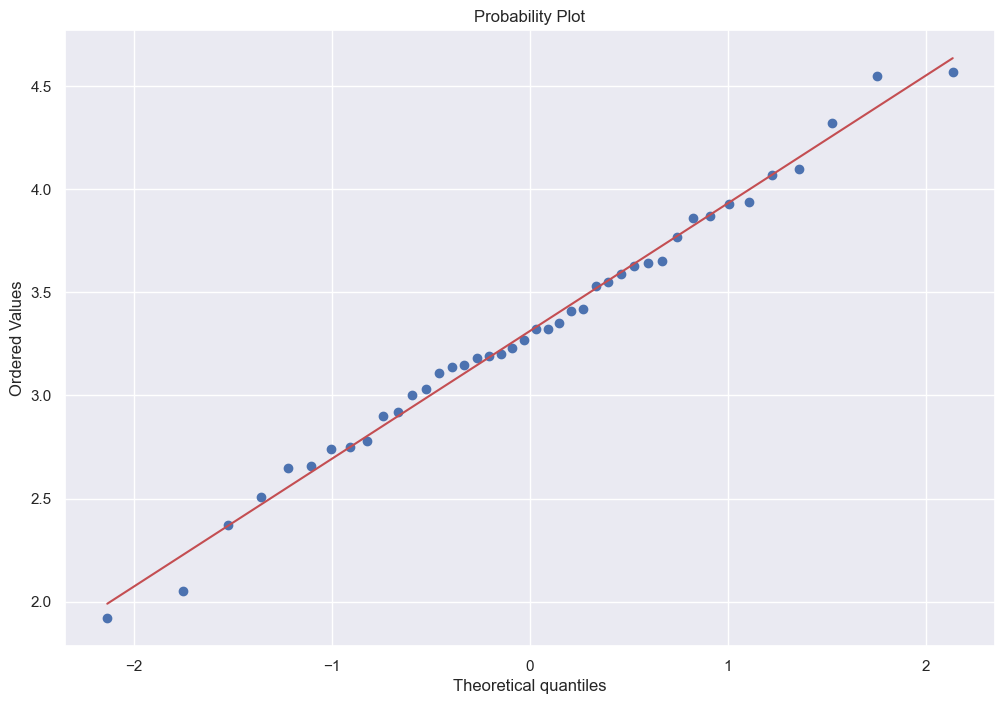

In [8]:
# compare birthweight against normal distribution
plt.figure(figsize=(12,8))
stats.probplot(birth_weight_data['Birthweight'], dist='norm', plot=plt)

In [9]:
# shapiro test whether data is normally distributed
stats.shapiro(birth_weight_data['Birthweight'])

ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684653878211975)

<Axes: xlabel='smoker', ylabel='Birthweight'>

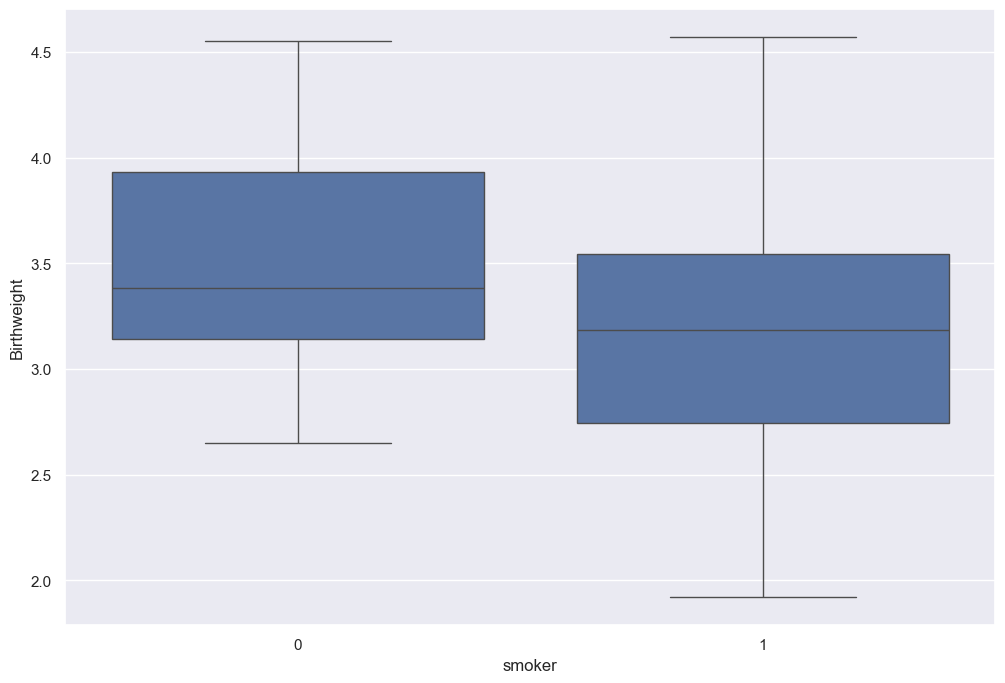

In [10]:
# does the mother being a smoker affect birthweight or not
plt.figure(figsize=(12,8))
sns.boxplot(birth_weight_data, x='smoker', y='Birthweight')

In [11]:
# split the data into two samples, smoker and non-smoker
sample_01 = birth_weight_data[(birth_weight_data['smoker'] == 0)]
sample_02 = birth_weight_data[(birth_weight_data['smoker'] == 1)]

In [12]:
sample_01.shape, sample_02.shape

((20, 16), (22, 16))

In [13]:
# make the sample sizes identical
sample_02 = sample_02.sample(20)
sample_01.shape, sample_02.shape

((20, 16), (20, 16))

In [14]:
# levene statistical test
# test used to assess the equality of variances for a variable calculated across two or more groups. 
# It's commonly employed to check the assumption of equal variances (homogeneity of variance) 

stats.levene(sample_01['Birthweight'], sample_02['Birthweight'])

LeveneResult(statistic=0.0923045242412846, pvalue=0.7629250238227825)

In [15]:
# run t-test
# a statistical hypothesis test used to determine if there's a significant difference between the means of two groups

stats.ttest_ind(sample_01['Birthweight'], sample_02['Birthweight'])

TtestResult(statistic=2.074545978151827, pvalue=0.04485220781367761, df=38.0)

<Axes: xlabel='Headcirc', ylabel='Count'>

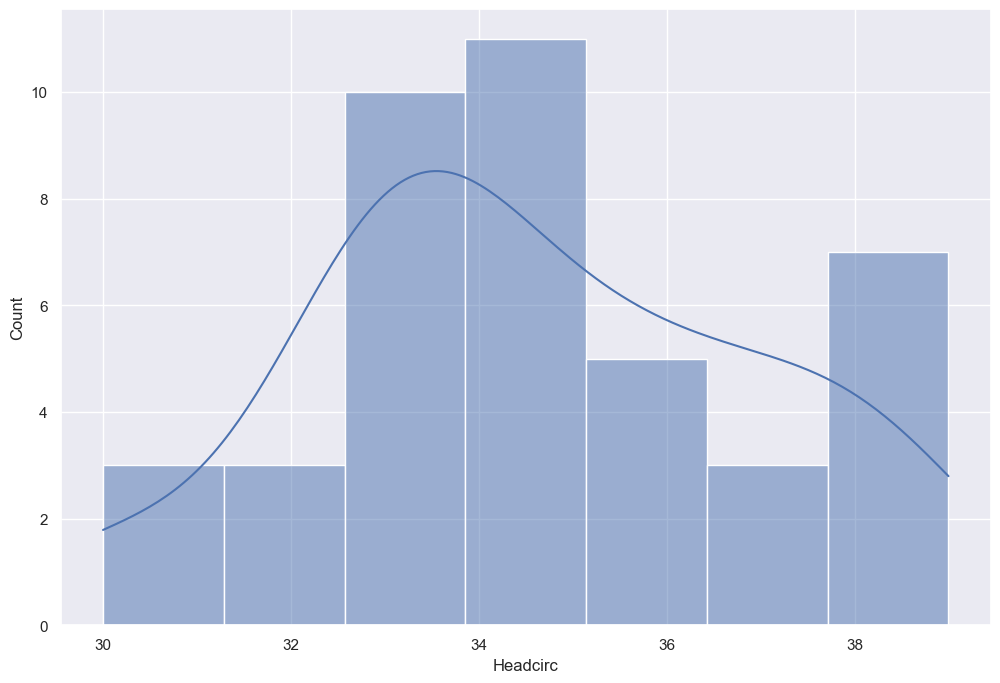

In [17]:
# use another part of the data, head circumference to check
plt.figure(figsize = (12,8))
sns.histplot(birth_weight_data['Headcirc'], kde=True)

((array([-2.13530463, -1.75401012, -1.52749667, -1.35994814, -1.2237273 ,
         -1.10706946, -1.00380487, -0.91026749, -0.8240868 , -0.74363219,
         -0.66772711, -0.5954891 , -0.52623439, -0.45941783, -0.39459348,
         -0.33138763, -0.2694798 , -0.20858878, -0.14846216, -0.08886798,
         -0.02958803,  0.02958803,  0.08886798,  0.14846216,  0.20858878,
          0.2694798 ,  0.33138763,  0.39459348,  0.45941783,  0.52623439,
          0.5954891 ,  0.66772711,  0.74363219,  0.8240868 ,  0.91026749,
          1.00380487,  1.10706946,  1.2237273 ,  1.35994814,  1.52749667,
          1.75401012,  2.13530463]),
  array([30, 30, 30, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34,
         34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37,
         37, 38, 38, 38, 38, 38, 39, 39], dtype=int64)),
 (2.4213738804472213, 34.595238095238095, 0.9792987436643016))

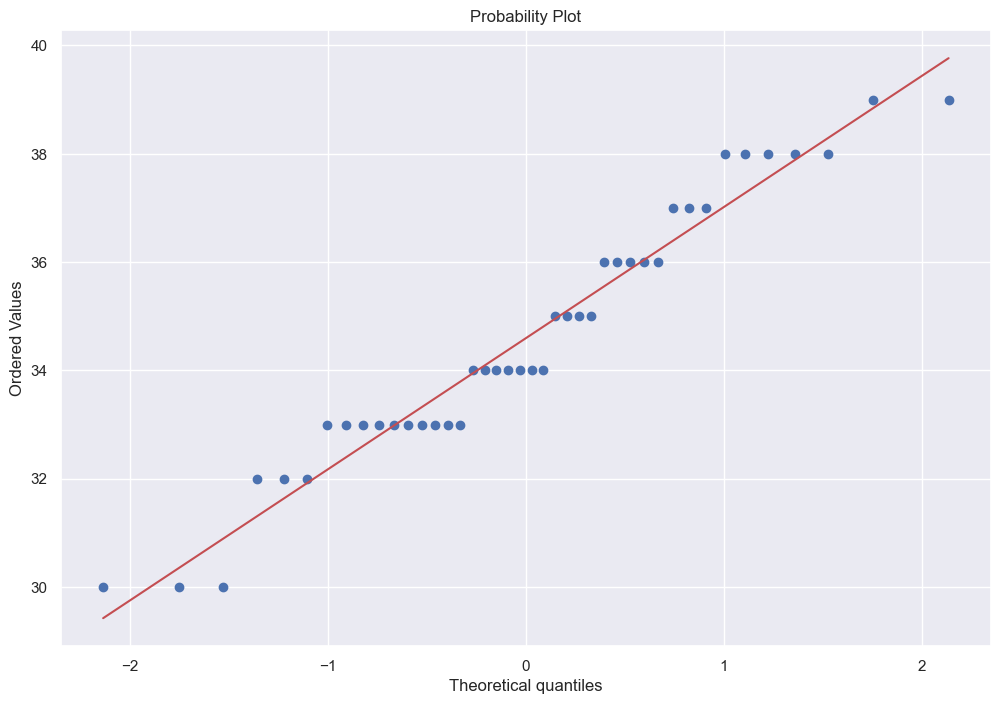

In [19]:
plt.figure(figsize = (12,8))
stats.probplot(birth_weight_data['Headcirc'], dist='norm', plot=plt)

In [20]:
stats.shapiro(birth_weight_data['Headcirc'])

ShapiroResult(statistic=0.9504269957542419, pvalue=0.06689990311861038)

<Axes: xlabel='smoker', ylabel='Headcirc'>

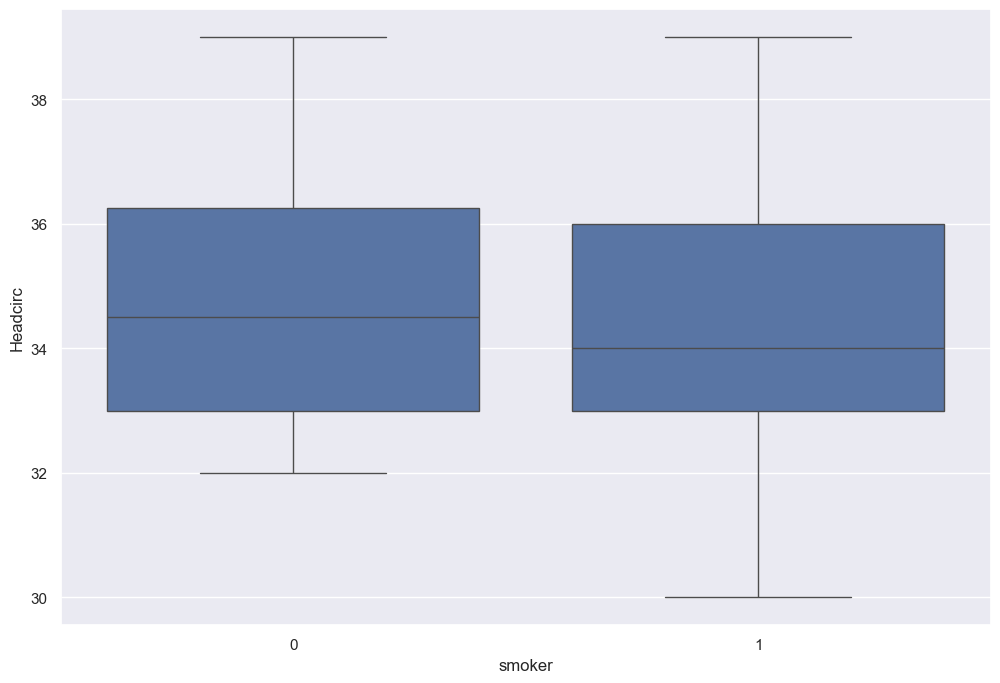

In [22]:
plt.figure(figsize = (12,8))
sns.boxplot(y=birth_weight_data['Headcirc'], x=birth_weight_data['smoker'])

In [23]:
stats.levene(sample_01['Headcirc'], sample_02['Headcirc'])

LeveneResult(statistic=0.4704264099037134, pvalue=0.4969546247312815)

In [24]:
stats.ttest_ind(sample_01['Headcirc'], sample_02['Headcirc'])

TtestResult(statistic=0.8111773283374268, pvalue=0.42231571968940984, df=38.0)